# Part I - EDA - Exploratory Data Analysis & Pre-processing

In [1]:
# import necessary libaries
import pandas as pd
import numpy as np

In [197]:
# open data file
df = pd.read_csv('Wholesale_Data.csv')
df.shape

(440, 8)

In [198]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [199]:
# channel and region are presumably the groups of which we would be predicting for
# therefore not needed to examine

df = df.iloc[:,2:]
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [85]:
#checking for null values

null_values = df.isnull().sum()
print(null_values)

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [86]:
#checking data value types
df.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [87]:
# checking for range of values in each column

for column in df:
    print(df[column].value_counts())

Fresh
9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: count, Length: 433, dtype: int64
Milk
3045     2
1610     2
5139     2
2428     2
3587     2
        ..
1596     1
7152     1
13252    1
4280     1
1698     1
Name: count, Length: 421, dtype: int64
Grocery
1664    2
2062    2
683     2
3600    2
6536    2
       ..
7305    1
3343    1
5034    1
8282    1
2510    1
Name: count, Length: 430, dtype: int64
Frozen
2540    2
425     2
1285    2
4324    2
1619    2
       ..
2995    1
321     1
2279    1
825     1
65      1
Name: count, Length: 426, dtype: int64
Detergents_Paper
118    2
955    2
256    2
69     2
918    2
      ..
516    1
399    1
51     1
960    1
477    1
Name: count, Length: 417, dtype: int64
Delicassen
3       4
834     4
548     3
610     3
395     3
       ..
318     1
1450    1
2616    1
929     1
52      1
Name: count, Length: 403, dtype: int64


In [88]:
# no obvious errors to solve

df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


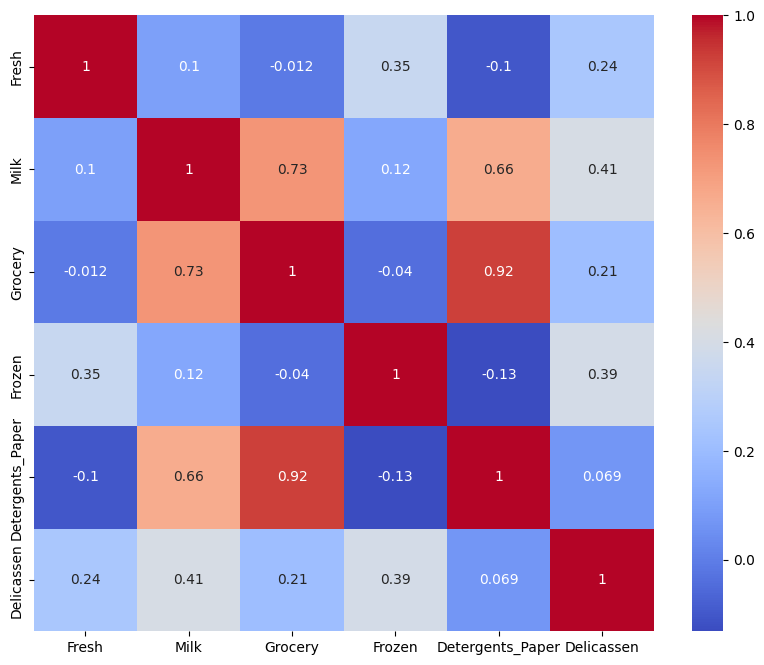

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

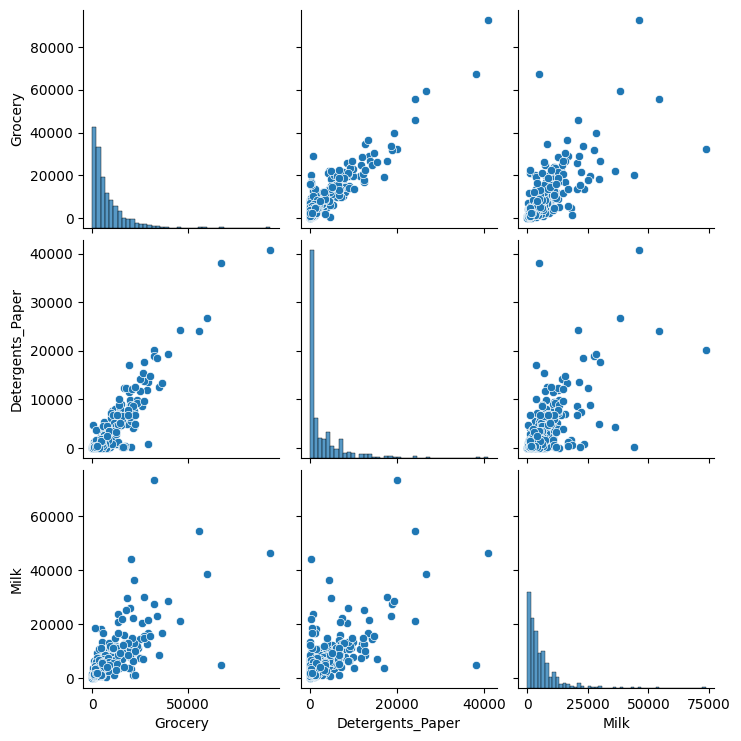

In [69]:
#show pairplot for the variables that have strong correlation

subset_columns = ['Grocery', 'Detergents_Paper', 'Milk']

sns.pairplot(df[subset_columns])
plt.show()

In [90]:
# outlier detection using z scores
# print how many rows with outliers

from scipy import stats

z_scores = stats.zscore(df)
z_scores = pd.DataFrame(z_scores, columns= df.columns)
outliers_df = (abs(z_scores) > 3)

print(len(df[outliers_df.any(axis=1)]))

26


In [91]:
# extreme outliers

extreme_z_scores = stats.zscore(df)
extreme_z_scores = pd.DataFrame(z_scores, columns= df.columns)
extreme_outliers_df = (abs(extreme_z_scores) > 6)

print(len(df[extreme_outliers_df.any(axis=1)]))

8


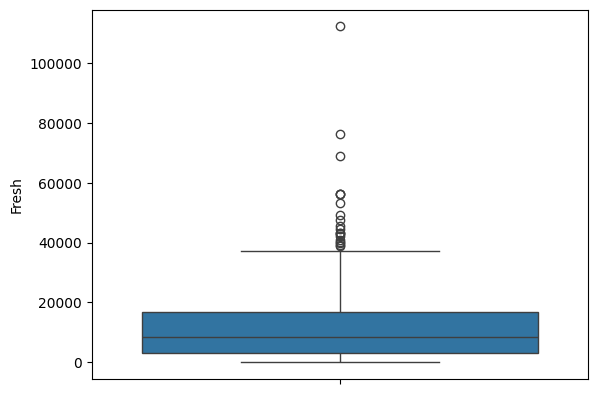

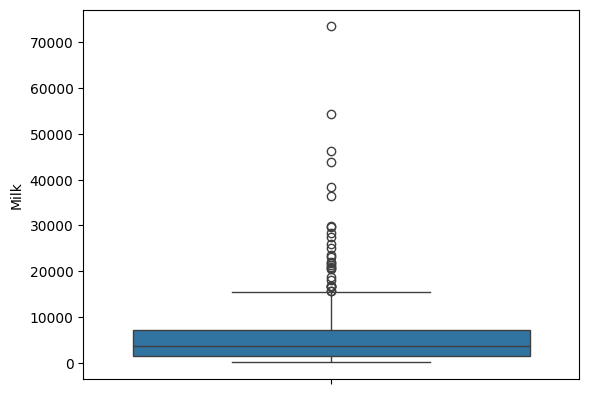

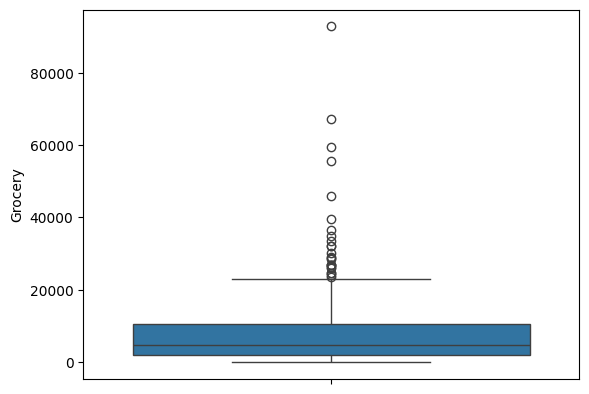

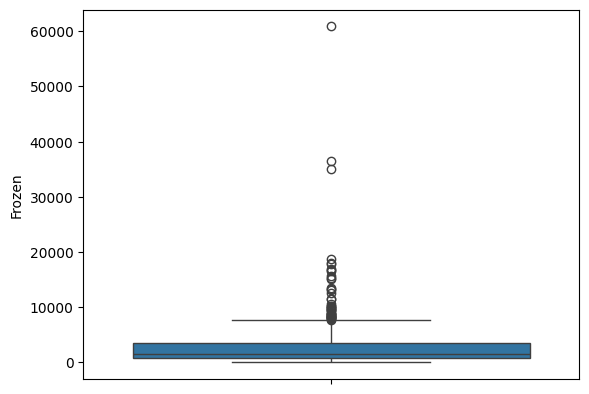

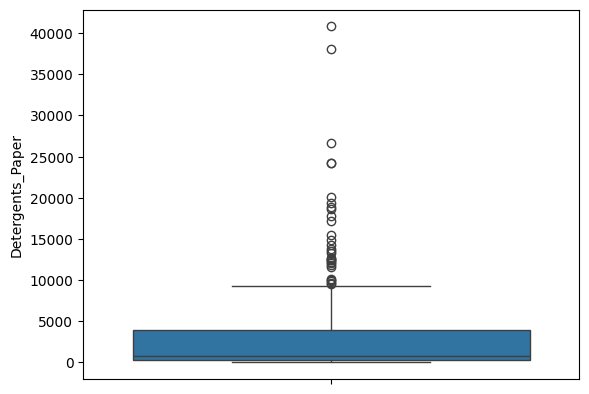

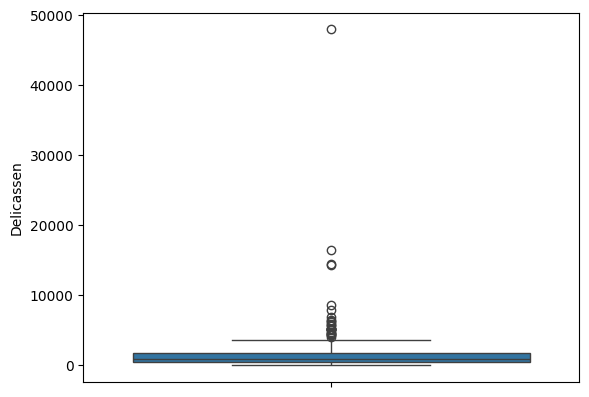

In [92]:
# visual representation of outliers for each column

for column in df:
    sns.boxplot(df[column])
    plt.show()

In [95]:
# remove extreme outliers from the data

df_no_outlier = df[~extreme_outliers_df.any(axis=1)]
df_no_outlier.shape

(432, 6)

In [105]:
# min max normalizing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_outlier)
X_scaled.shape

(432, 6)

In [106]:
# PCA feature selection

from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

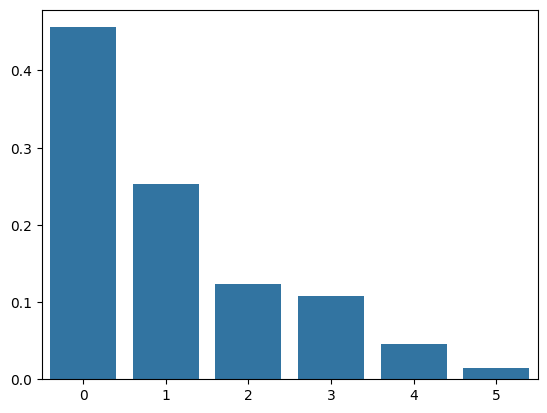

[0.45597916 0.25277249 0.12380491 0.1074513  0.0452439  0.01474824]


In [118]:
# graph of the explained variance by PCA

explained_variance_ratio = pca.explained_variance_ratio_
sns.barplot(explained_variance_ratio)
plt.show()
print(explained_variance_ratio)

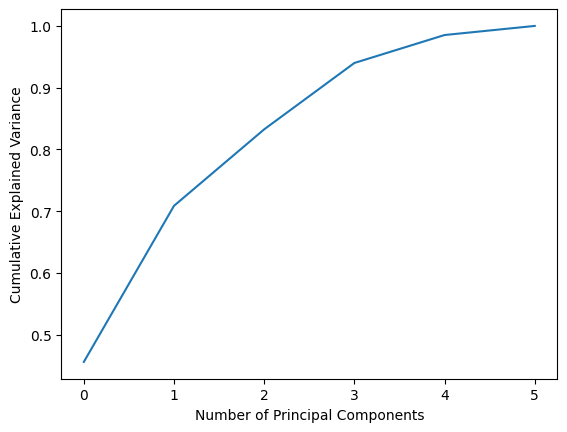

[0.45597916 0.70875166 0.83255657 0.94000787 0.98525176 1.        ]


In [122]:
# cumulative variance of PCA

cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(cumulative_explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()
print(cumulative_explained_variance)

In [143]:
num_components_to_use = 4
X_selected = X_pca[:, :num_components_to_use]

General conclusions / Proceedure from Part 1

* Channel and Region presumable create the groups of which we have to predict and cluster (remove from predicting columns)
* original data did not have any null values
* strong positive correlation between:
    * grocery x milk
    * detergents_paper x milk
    * detergents_paper x grocery
* Outlier consideration:
    * 26 outliers outside a threshold of 3 
    * 8 outliers outside a range of 6. (get rid of these outliers for normalizing
* Standard Scaler
* PCA feature selection
    * 4 PC represent ~94% of the variance
    



# Part II - KMeans Clustering

In [127]:
from sklearn.cluster import KMeans

C:\Users\ellis\anaconda3\envs\THEpython3.9\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellis\anaconda3\envs\THEpython3.9\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellis\anaconda3\envs\THEpython3.9\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellis\anaconda3\envs\THEpython3.9\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

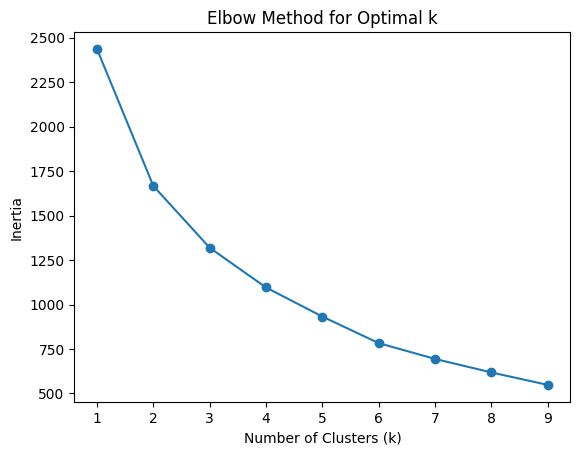

In [146]:
# Get the inertia (within-cluster sum of squares) for different values of k
inertia_values = []
for k in range(1, 11):
    kmeans_temp = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_temp.fit(X_selected)
    inertia_values.append(kmeans_temp.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [147]:
# Choose the optimal number of clusters based on the elbow plot
num_clusters = 6  # Replace with your optimal number of clusters

# Initialize centroids
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Assign data points to clusters
cluster_assignments = kmeans.fit_predict(X_selected)

# Updated centroids
updated_centroids = kmeans.cluster_centers_

C:\Users\ellis\anaconda3\envs\THEpython3.9\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


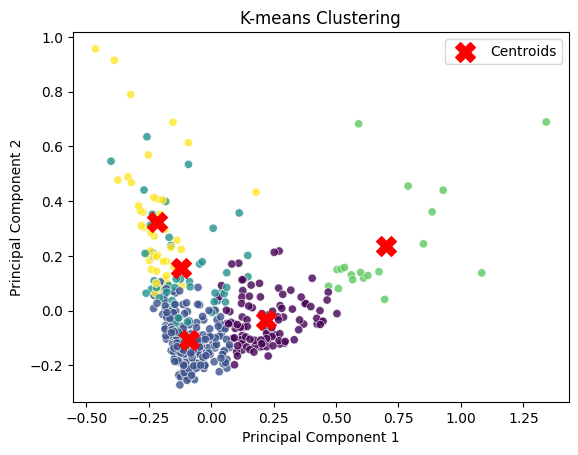

In [138]:
#plotting scatter with clusters and their centroids for only 2D

plt.scatter(X_selected[:, 0], X_selected[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.8, edgecolors='w', linewidths=0.5)
plt.scatter(updated_centroids[:, 0], updated_centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

# Part III - Hierarchical Clustering

In [148]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [181]:
#hierarchical clustering

num_clusters = 4  


hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
cluster_assignments = hierarchical_clustering.fit_predict(X_selected)

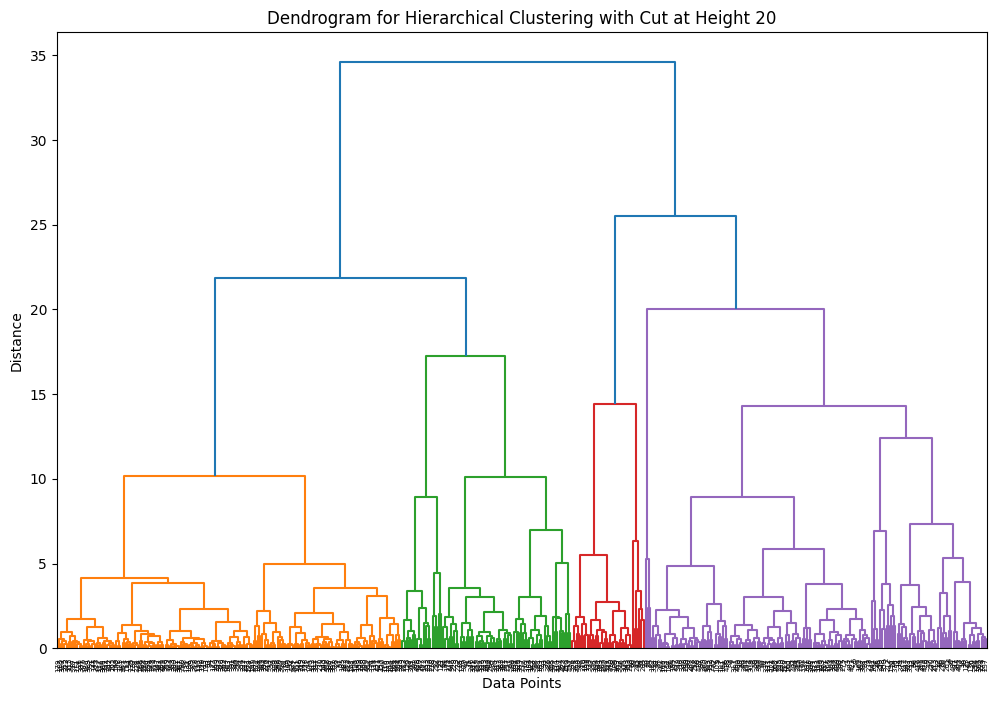

In [190]:
# Linkage matrix
linkage_matrix = linkage(X_selected, method='ward')

cut_height = 21
cluster_labels = fcluster(linkage_matrix, cut_height, criterion='distance')

clustered_data = np.column_stack((X_selected, cluster_labels))

# Plot the dendrogram with the cut
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, color_threshold=cut_height)
plt.title('Dendrogram for Hierarchical Clustering with Cut at Height 20')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

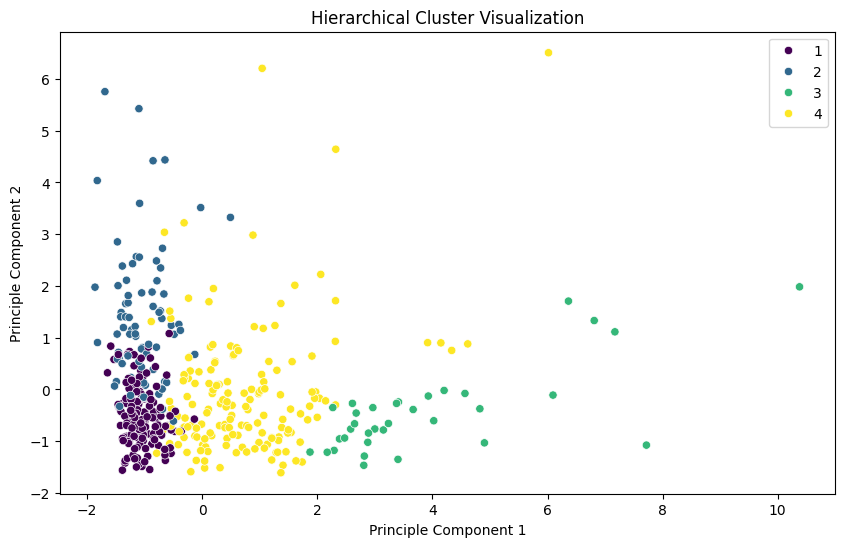

Cluster 1 Mean Values: [-1.04610739 -0.50649659  0.16138686 -0.12654172]
Cluster 2 Mean Values: [-1.03912033  1.35403543 -0.73815118  0.37611567]
Cluster 3 Mean Values: [ 3.89871727 -0.43236778 -0.82930336 -0.07479326]
Cluster 4 Mean Values: [ 0.7352912  -0.07062164  0.3816878  -0.04354397]


In [207]:
#plotting hierarchical cluster visualization for only 2D

data_with_clusters = np.column_stack((X_selected, cluster_labels))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_with_clusters[:, 0], y=data_with_clusters[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Hierarchical Cluster Visualization')
plt.xlabel('Principle Component 1')  # Replace with your actual feature name or index
plt.ylabel('Principle Component 2')  # Replace with your actual feature name or index
plt.show()

# Analyzing the characteristics of each cluster
cluster_means = [np.mean(X_selected[cluster_labels == i], axis=0) for i in range(1, num_clusters + 1)]

# Display mean values for each cluster
for i, mean_values in enumerate(cluster_means, 1):
    print(f'Cluster {i} Mean Values:', mean_values)

# Part IV - PCA

In [208]:
# loadings
loadings = pd.DataFrame(pca.components_[:num_components_to_use, :].T, columns=[f'PC{i+1}' for i in range(num_components_to_use)], index=df_no_outlier.columns)

print(loadings)

                       PC1       PC2       PC3       PC4
Fresh            -0.120103  0.608925 -0.184805 -0.760010
Milk              0.535190  0.135777 -0.019531  0.066951
Grocery           0.574242  0.021541 -0.173513 -0.087603
Frozen           -0.117909  0.590051 -0.506888  0.611672
Detergents_Paper  0.557609 -0.087557 -0.247026 -0.074547
Delicassen        0.211101  0.504464  0.785750  0.174722


#### PCA conclusions
* PC1 Customer group
    * high positive loading: Milk, Grocery, Detergents_Paper
* PC2 Customer group
    * high positive loading: Fresh, Frozen, Delicassen
* PC3 Customer group
    * high positive loading: Delicassen
    * moderate negative loading: Frozen
* PC4 Customer group
    * high negative loading: Fresh, Frozen

# Part V - Conclusion

Using the EDA and the model developed, here are 4 conclusions points:


* There exists strong positive correlation between in the original data between:
            * grocery x milk
            * detergents_paper x milk
            * detergents_paper x grocery

* Using PCA, 3 Principle Components represent ~83% of the variance and 4 Principle Components represent ~94% of the variance (I chose to use 4 PC but could explore using 3 PC in future endeavors)

* Using the elbow method for KMeans Clustering, 5 groups of customers were identified 

* Using the Hierarchical Clustering, (subjective) height of 21 on the dendrogram dictated there to be 4 groups of customers identified
